In [1]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib

import statsmodels.formula.api as smf
import statsmodels.api as sm
from ggplot import *

from pandas.plotting import scatter_matrix

import statsmodels.api as sms
%matplotlib inline

In [3]:
houses = pd.read_csv('data/King_County_House_prices_dataset.csv')

# Column_name explanation
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Understanding and setting 
**Our target group** for this presentation will be married couples or families that belongs in middle class and looking to buy a house around the center or at suburbs.

#### First need to identify the variable that we want to investigate:
from a first assumption the most important categories would be: 1. price, 2. location(zipcode, lat, long), 3. sqft(living and lot), 4. and last if the building are new or renovated and in a good condition

## A quick overwie of our Dataframe

In [4]:
houses.shape

(21597, 21)

In [5]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
houses.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [7]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
houses.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [9]:
houses.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [10]:
missing = pd.DataFrame(houses.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/houses.shape[0]*100,1)
missing[missing.Number!=0]

,Number,Percentage
waterfront,2376,11.0
view,63,0.3
yr_renovated,3842,17.8


## Data cleaning

In [11]:
# create a copy of the dataframe that we want to ransform
df = houses.copy()

In [12]:
# we drop for now in our copy the id because we don't need it in our statistics
df.drop(['id'],axis=1, inplace=True)

In [13]:
# remove the NaN and put 1 as an indicator that the house has a basement
df.sqft_basement = pd.to_numeric(df.sqft_basement, errors='coerce')
df['basement_present'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0) 
df.drop(['sqft_basement'],axis=1, inplace=True)

In [14]:
# remove the NaN and put 1 as an indicator that the house is renovated 
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0) 
df.drop(['yr_renovated'],axis=1, inplace=True)

In [15]:
# same for the waterfront
df['waterfront_view'] = df['waterfront'].apply(lambda x: 1 if x > 0 else 0) 
df.drop(['waterfront'],axis=1, inplace=True)

In [16]:
#last for the view we will let the numbers as is, but for the NaN we will put 0
df['viewed'] = df['view'].apply(lambda x: x if x > 0 else 0) 
df.drop(['view'],axis=1, inplace=True)

In [17]:
# split the date to year and month
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year 
df['month'] = df['date'].dt.month
df.drop(['date'],axis=1, inplace=True)

In [18]:
## for later invastigation we are going to make a new column of price_per_sqft
df.eval('price_per_sqft = price / sqft_living', inplace = True)

In [19]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,...,long,sqft_living15,sqft_lot15,basement_present,renovated,waterfront_view,viewed,year,month,price_per_sqft
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,...,-122.257,1340,5650,0,0,0,0.0,2014,10,188.050847
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,...,-122.319,1690,7639,1,1,0,0.0,2014,12,209.338521
2,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,...,-122.233,2720,8062,0,0,0,0.0,2015,2,233.766234
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,...,-122.393,1360,5000,1,0,0,0.0,2014,12,308.163265
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,...,-122.045,1800,7503,0,0,0,0.0,2015,2,303.571429


In [20]:
df.shape[1]

22

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21597 non-null  float64
 1   bedrooms          21597 non-null  int64  
 2   bathrooms         21597 non-null  float64
 3   sqft_living       21597 non-null  int64  
 4   sqft_lot          21597 non-null  int64  
 5   floors            21597 non-null  float64
 6   condition         21597 non-null  int64  
 7   grade             21597 non-null  int64  
 8   sqft_above        21597 non-null  int64  
 9   yr_built          21597 non-null  int64  
 10  zipcode           21597 non-null  int64  
 11  lat               21597 non-null  float64
 12  long              21597 non-null  float64
 13  sqft_living15     21597 non-null  int64  
 14  sqft_lot15        21597 non-null  int64  
 15  basement_present  21597 non-null  int64  
 16  renovated         21597 non-null  int64 

## Categorization of our variables and a overall overveiw

In [22]:
# Catergorize the variable for our next step of data cleening in continuous and categorical
cat = ['waterfront','view','condition','grade']
con = ['price','bedrooms','bathrooms','sqft_living','sqft_lot',
       'floors','sqft_above','basement_present','yr_built','renovated',
       'sqft_living15','sqft_lot15']
len(con), len(cat)

(12, 4)

###### We check the correlation table

(0.0, 12.0)

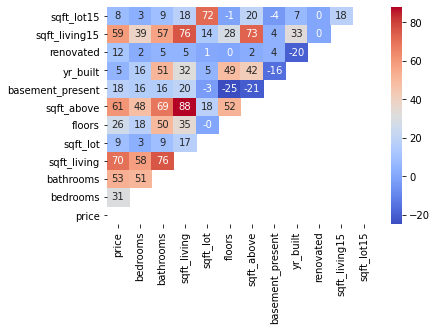

In [23]:
target_dum=pd.get_dummies(df[con].copy())
mask = np.triu(target_dum.corr())
ax = sns.heatmap(round(target_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm')
ax.set_ylim((0,12))

In [24]:
###### A quick look through the reggression graphs

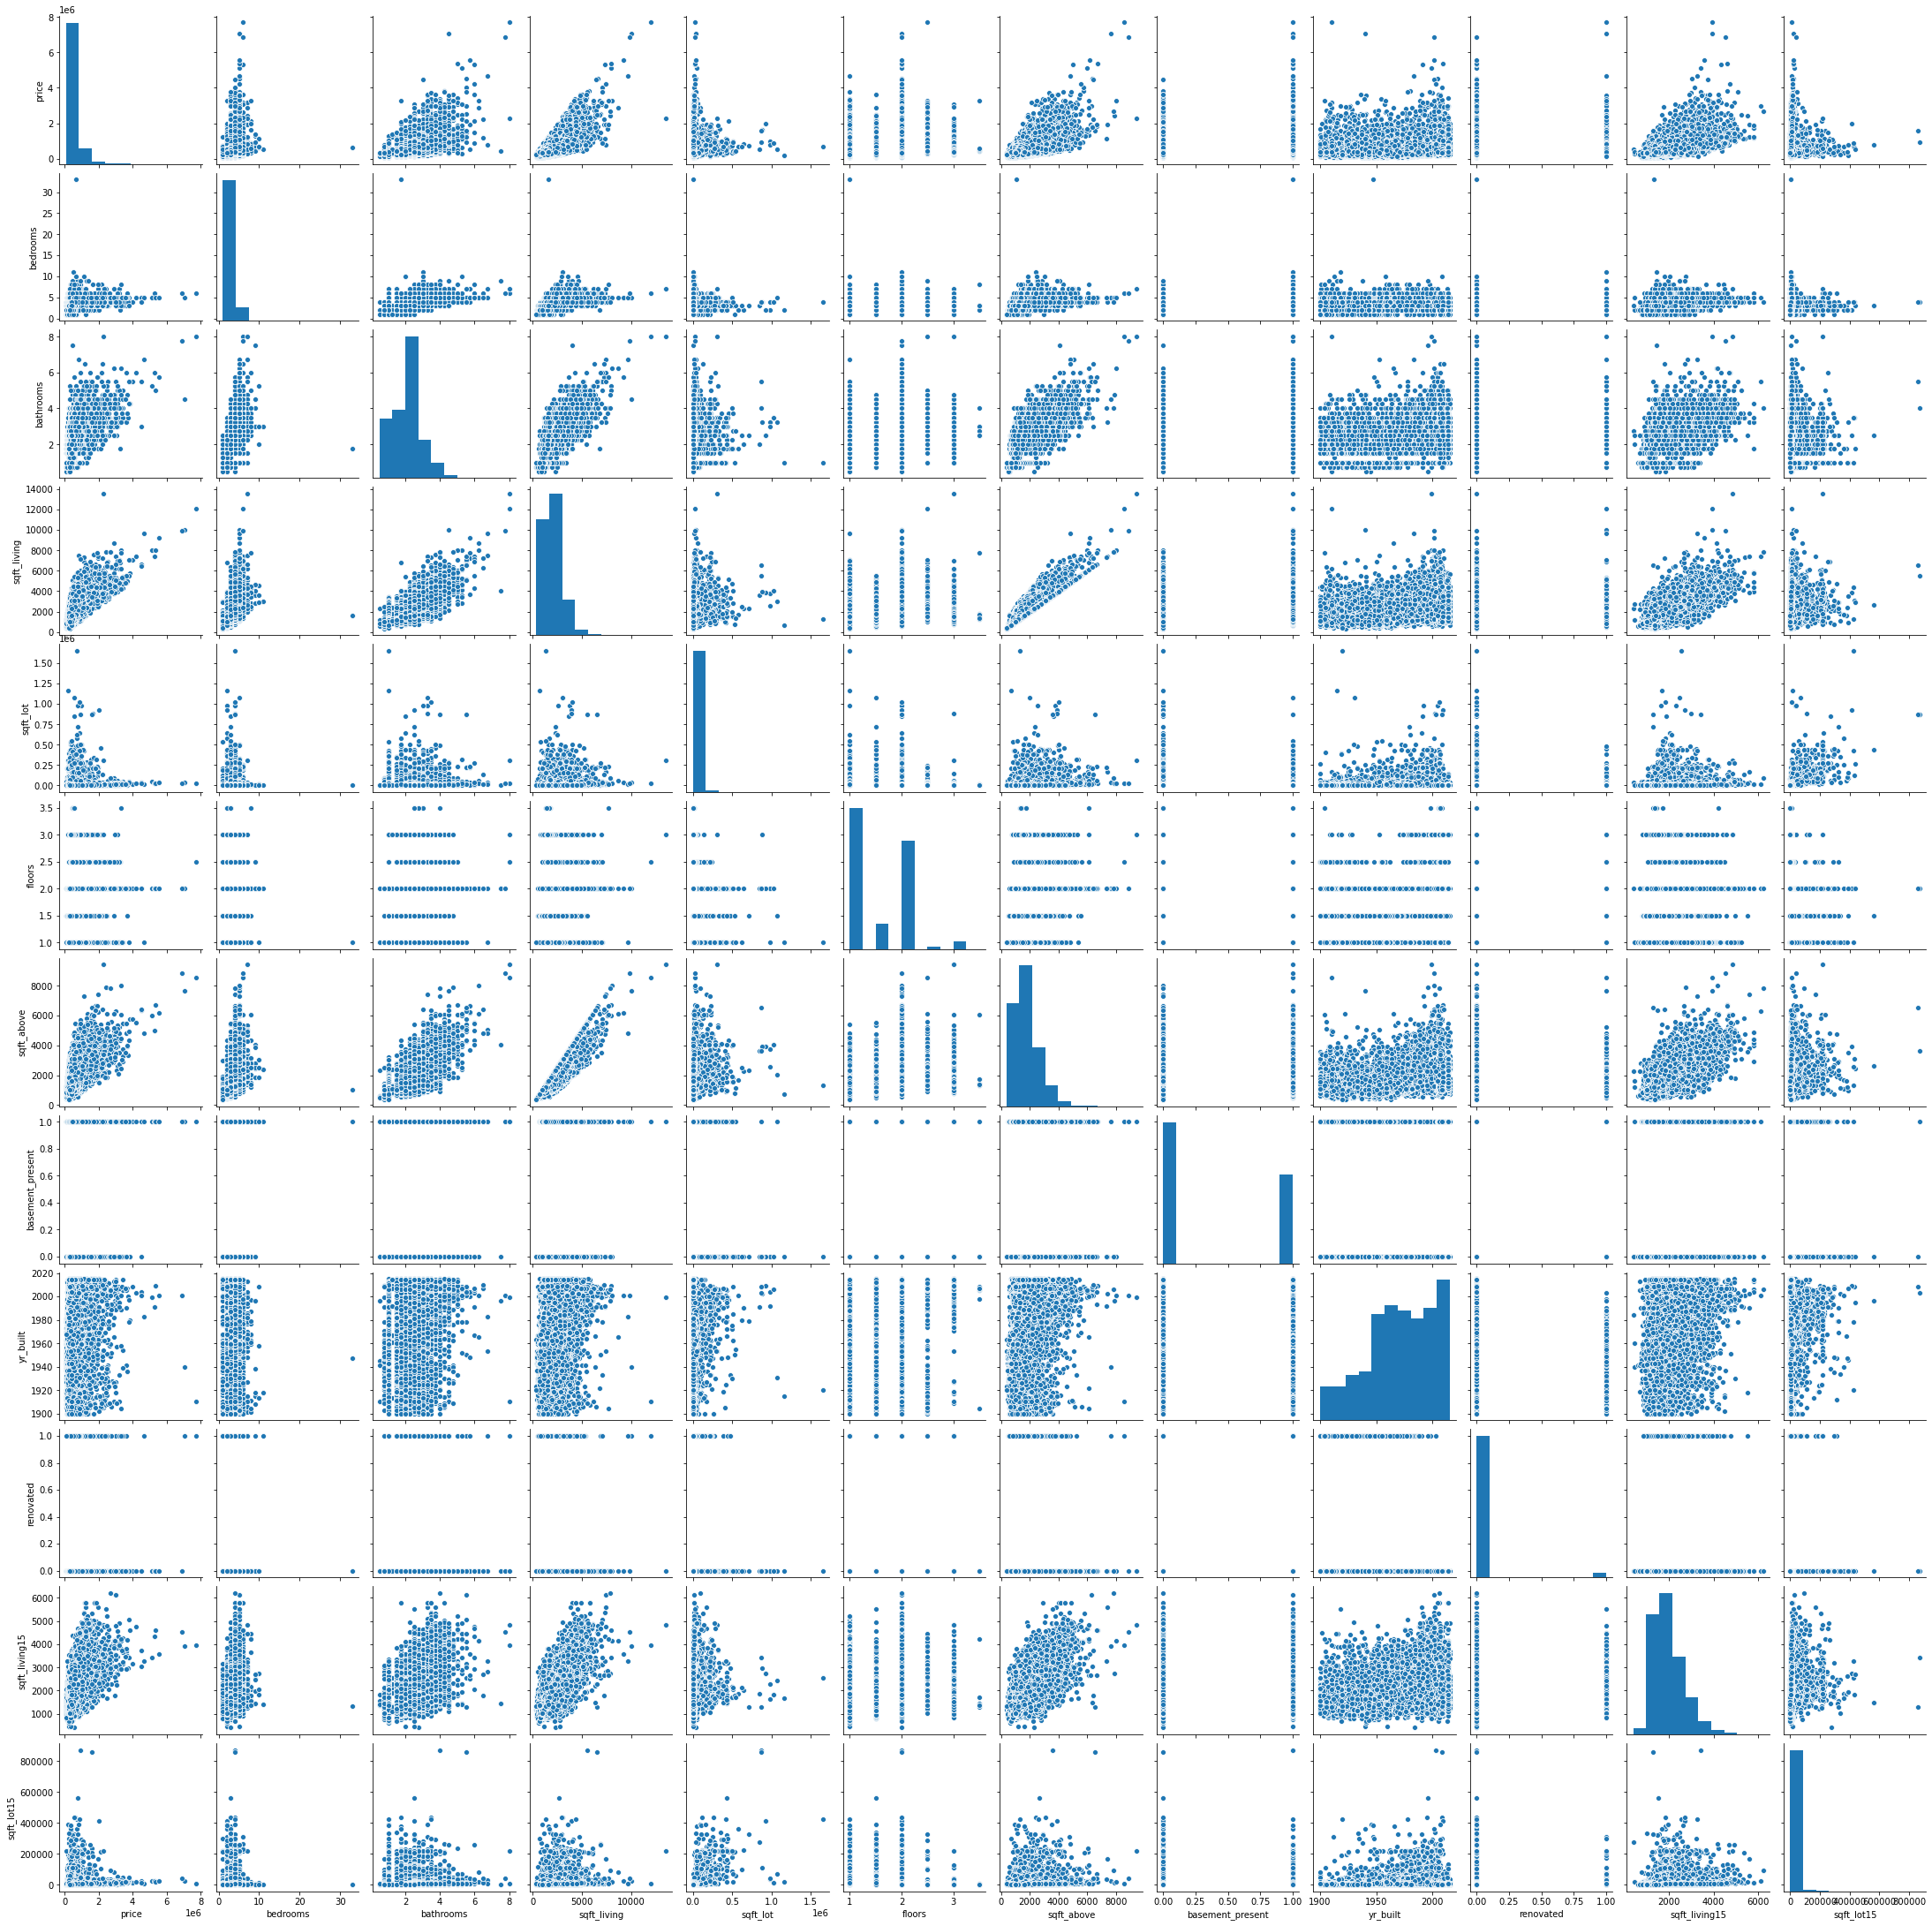

In [25]:
contin_dum=pd.get_dummies(df[con].copy())
sns.pairplot(contin_dum)

#### looking through the regression we notice that we have some extreme outliers that affect negative our statistics. These would be the following:

#### 1. Bedrooms

In [26]:
df.bedrooms.max()

33

In [27]:
df.sort_values(['bedrooms'], ascending=False).head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,...,long,sqft_living15,sqft_lot15,basement_present,renovated,waterfront_view,viewed,year,month,price_per_sqft
15856,640000.0,33,1.75,1620,6000,1.0,5,7,1040,1947,...,-122.331,1330,4700,1,0,0,0.0,2014,6,395.061728
8748,520000.0,11,3.00,3000,4960,2.0,3,7,2400,1918,...,-122.363,1420,4960,1,1,0,0.0,2014,8,173.333333
13301,1150000.0,10,5.25,4590,10920,1.0,3,9,2500,2008,...,-122.113,2730,10400,1,0,0,2.0,2014,8,250.544662


In [28]:
#delete the entire first line with the extreme number of rooms
df.drop(15856, axis=0, inplace=True) 

#### 2. sqft_lot

In [29]:
df.sort_values(['sqft_lot'], ascending=False).head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,...,long,sqft_living15,sqft_lot15,basement_present,renovated,waterfront_view,viewed,year,month,price_per_sqft
1717,700000.0,4,1.00,1300,1651359,1.0,4,6,1300,1920,...,-122.023,2560,425581,0,0,0,3.0,2015,3,538.461538
17305,190000.0,2,1.00,710,1164794,1.0,2,5,710,1915,...,-121.909,1680,16730,0,0,0,0.0,2015,5,267.605634
7640,542500.0,5,3.25,3010,1074218,1.5,5,8,2010,1931,...,-122.004,2450,68825,1,0,0,0.0,2014,5,180.232558


In [30]:
df.drop(1717, axis=0, inplace=True) 

#### 3. sqft_lot15

In [31]:
df.sort_values(['sqft_lot15'], ascending=False).head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,...,long,sqft_living15,sqft_lot15,basement_present,renovated,waterfront_view,viewed,year,month,price_per_sqft
9705,937500.0,4,4.0,5545,871200,2.0,3,11,3605,2003,...,-121.882,3420,871200,1,0,0,0.0,2015,1,169.071235
20436,1600000.0,4,5.5,6530,871200,2.0,3,11,6530,2008,...,-121.878,1280,858132,0,0,0,2.0,2015,4,245.022971
13451,790000.0,3,2.5,2640,432036,1.5,3,10,2640,1996,...,-122.036,1500,560617,0,0,0,3.0,2014,11,299.242424


In [32]:
df.drop(9705, axis=0, inplace=True) 
df.drop(20436, axis=0, inplace=True) 

#### 4. sqft_living

In [33]:
df.sort_values(['sqft_living'], ascending=False).head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,...,long,sqft_living15,sqft_lot15,basement_present,renovated,waterfront_view,viewed,year,month,price_per_sqft
12764,2280000.0,7,8.0,13540,307752,3.0,3,12,9410,1999,...,-121.986,4850,217800,1,0,0,4.0,2014,5,168.389956
7245,7700000.0,6,8.0,12050,27600,2.5,4,13,8570,1910,...,-122.323,3940,8800,1,1,0,3.0,2014,10,639.004149
3910,7060000.0,5,4.5,10040,37325,2.0,3,11,7680,1940,...,-122.214,3930,25449,1,1,1,2.0,2014,6,703.187251


In [34]:
df.drop(12764, axis=0, inplace=True) 
df.drop(7245, axis=0, inplace=True) 

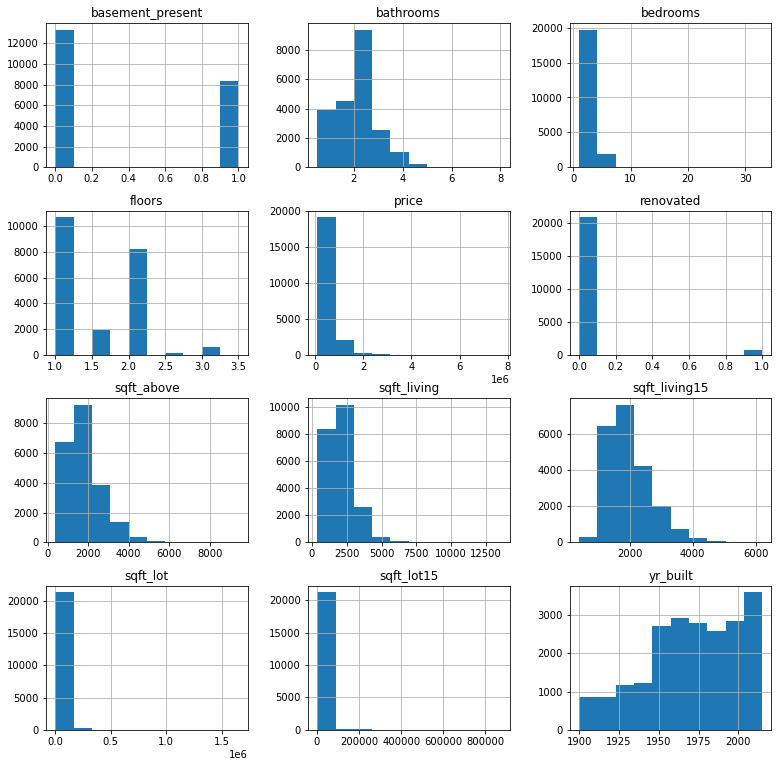

In [35]:
_ = target_dum.hist(figsize=(13,13))

# Looking at variable individually

# A) Prices
* From the histogram we notice that the most of the prices are around 100,000- 1,000,000$
* From the scatter graphs above, as expected we see a strong correlation between footage of the home or lot and the prices, as long as the grades, that we shouldn't rely rely on. 
* to investigate further we should look more closely into geographical parts of King county. because we expect that in the center of seattle the average price should be much higher than in the suburbs
* But let's first have a deaper look into prices and how are they collerated with the location, the footage and the year of build.

#### Inclusive overview of the correlation between the prince and the other variables

In [36]:
df[['price']].describe().round(2)

,price
count,21591.00
mean,539804.90
std,363897.18
min,78000.00
25%,322000.00
50%,450000.00
75%,645000.00
max,7060000.00


In [37]:
cor_tar_con = []
for each in con:
    cor_tar_con.append(np.corrcoef(df[each],df['price'])[0][1])
cor_label = pd.DataFrame({'Variables':con,'Correlation':cor_tar_con}).sort_values(by=['Correlation'],ascending=[0])

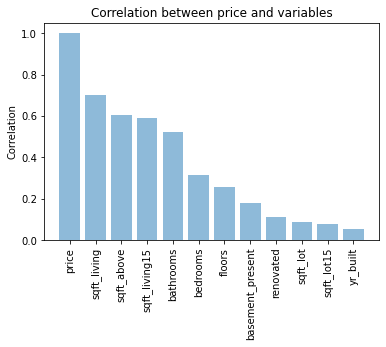

In [38]:
pos_1 = np.arange(len(con))
plt.bar(pos_1, cor_label['Correlation'], align='center', alpha=0.5)
plt.xticks(pos_1, cor_label['Variables'],rotation='vertical')
plt.ylabel('Correlation')
plt.title('Correlation between price and variables') 
plt.show()

#### Checking the variable with the strongest correlation

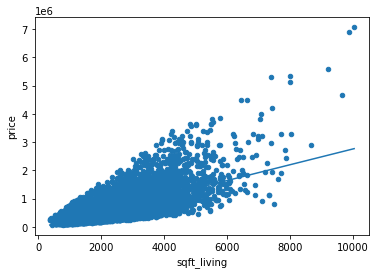

In [39]:
df.plot(x='sqft_living', y='price', kind='scatter')
plt.plot(np.unique(df.sqft_living), np.poly1d(np.polyfit(df.sqft_living, df.price, 1))(np.unique(df.sqft_living)));

In [40]:
smf.ols(formula='price  ~ sqft_living', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                 2.078e+04
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        05:33:05   Log-Likelihood:            -2.9982e+05
No. Observations:               21591   AIC:                         5.996e+05
Df Residuals:                   21589   BIC:                         5.997e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.142e+04   4402.622     -9.407      0.000      -5e+04   -3.28e+04
sqft_living   279.5655      1.939    144.149      0.000     275.764     283.367
==============================================================================
Omnibus:                    14138.555   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           429571.176
Skew:                           2.696   Prob(JB):                         0.00
Kurtosis:                      24.176   Cond. No.                     5.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

from this graph we get that they are positive correlated and that we notice the we have one outlier for the footage that affects our line

#### Checking in detail how all the variables of our dataset affects the price

In [41]:
without_pr = df.loc[:,df.columns !='price']
X = without_pr
X = sms.add_constant(X) 
y = df.price

model = sms.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     8490.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        05:33:05   Log-Likelihood:            -2.8307e+05
No. Observations:               21591   AIC:                         5.662e+05
Df Residuals:                   21569   BIC:                         5.664e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.555e+07   5.94e+06      2.618      0.009    3.91e+06    2.72e+07
bedrooms          -721.2946   1195.098     -0.604      0.546   -3063.774    1621.185
bathrooms         1.354e+04   1962.479      6.897      0.000    9689.315    1.74e+04
sqft_living        275.5489      3.660     75.295      0.000     268.376     282.722
sqft_lot            -0.1328      0.030     -4.462      0.000      -0.191      -0.074
floors           -1.975e+04   2146.538     -9.202      0.000    -2.4e+04   -1.55e+04
condition         6852.4262   1402.407      4.886      0.000    4103.606    9601.247
grade             1.942e+04   1351.152     14.375      0.000    1.68e+04    2.21e+04
sqft_above          17.1108      3.918      4.367      0.000       9.431      24.790
yr_built          -152.3611     44.619     -3.415      0.001    -239.819     -64.904
zipcode           -149.0408     19.761     -7.542      0.000    -187.773    -110.308
lat              -4.896e+04   7221.166     -6.780      0.000   -6.31e+04   -3.48e+04
long             -2.061e+04   7912.635     -2.605      0.009   -3.61e+04   -5105.078
sqft_living15      -24.8134      2.075    -11.959      0.000     -28.880     -20.746
sqft_lot15          -0.1342      0.045     -2.966      0.003      -0.223      -0.046
basement_present  9423.1280   3019.298      3.121      0.002    3505.080    1.53e+04
renovated         2.039e+04   4723.516      4.317      0.000    1.11e+04    2.97e+04
waterfront_view   2.833e+05   1.09e+04     25.930      0.000    2.62e+05    3.05e+05
viewed            1.309e+04   1279.488     10.228      0.000    1.06e+04    1.56e+04
year              -767.9860   2810.314     -0.273      0.785   -6276.410    4740.438
month               44.9382    420.111      0.107      0.915    -778.511     868.387
price_per_sqft    2012.4892     10.358    194.289      0.000    1992.186    2032.792
==============================================================================
Omnibus:                    18922.095   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4501488.247
Skew:                           3.462   Prob(JB):                         0.00
Kurtosis:                      73.398   Cond. No.                     7.34e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.34e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

from the statistics above we can choose the variables that have the greatest correlation with price. These will one of the sqft and preferebly the sqft_living, bedrooms, bathrooms, yr_built. Also we should have a closer look at grade, condition and waterfront and date

## 1. Waterfront_view

In [42]:
df.groupby('waterfront_view').describe()['price'].round(2)

,count,mean,std,min,25%,50%,75%,max
waterfront_view,,,,,,,,
0,21445.0,531788.96,339041.51,78000.0,320000.0,450000.0,640000.0,6890000.0
1,146.0,1717214.73,1145384.86,285000.0,827500.0,1510000.0,2282500.0,7060000.0


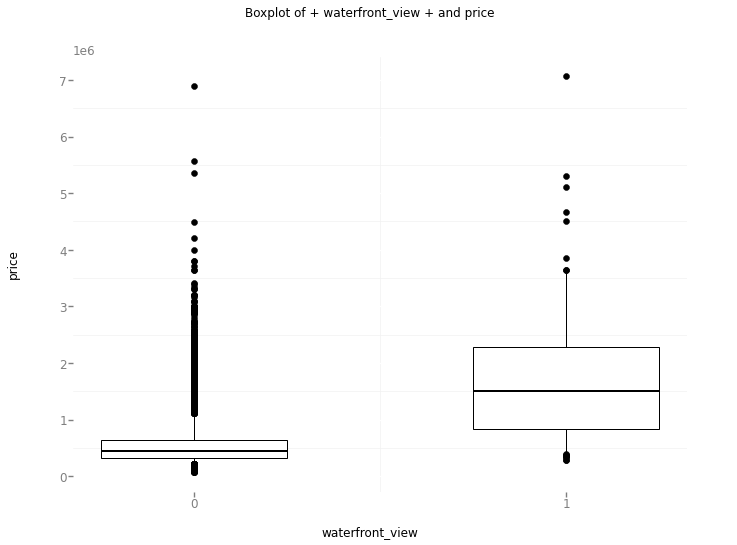

<ggplot: (8776843536017)>

In [43]:
ggplot(df,aes(x='waterfront_view',y='price'))+geom_boxplot() + theme_bw()+ggtitle('Boxplot of + waterfront_view + and price')

we notice a significant difference at the quartiels. The houses with a waterfront view have much higher price. For our group target we wouldn't like a house with a waterfront view

## 2. Date that house was sold

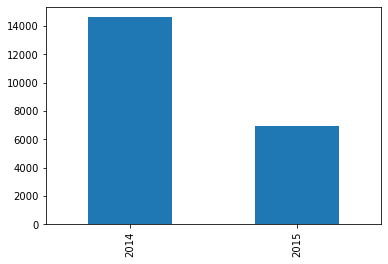

In [44]:
df.year.value_counts().plot(kind='bar')

It looks like we do not have data for all the month in the year 2015 

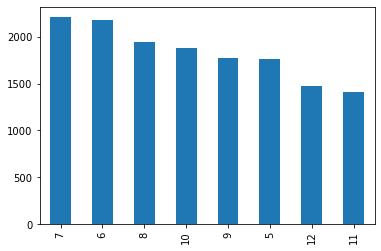

In [45]:
df.query('year == 2014').month.value_counts().plot(kind='bar');

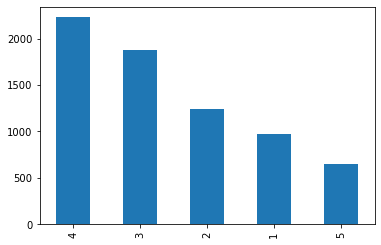

In [46]:
df.query('year == 2015').month.value_counts().plot(kind='bar');

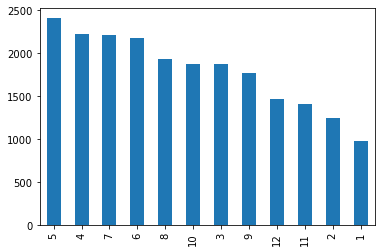

In [47]:
df.month.value_counts().plot(kind='bar');

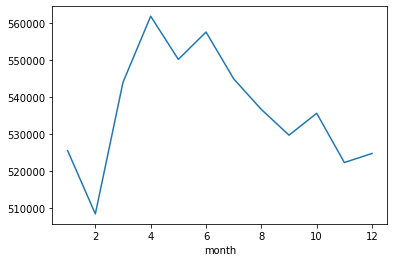

In [48]:
df.groupby(df['month'])['price'].mean().round(2).plot();

In [49]:
df.groupby('month').describe()['price'].round(2)

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,977.0,525542.03,366275.65,99000.0,310000.0,438000.0,625000.0,3570000.0
2,1247.0,508520.05,326338.14,89950.0,309000.0,426500.0,600000.0,3070000.0
3,1874.0,543974.47,355337.67,81000.0,319912.5,450000.0,654875.0,3400000.0
4,2228.0,561749.82,369614.50,84000.0,338675.0,476750.0,667875.0,5350000.0
5,2413.0,550133.15,371535.25,78000.0,330000.0,462000.0,645500.0,4210000.0
6,2177.0,557496.44,388299.26,92000.0,330000.0,465000.0,665000.0,7060000.0
7,2211.0,544892.16,346984.16,86500.0,325000.0,465000.0,653875.0,3800000.0
8,1939.0,536655.21,370833.67,107000.0,324848.5,442200.0,640000.0,5570000.0
9,1771.0,529723.52,372878.79,85000.0,325000.0,450000.0,624750.0,6890000.0


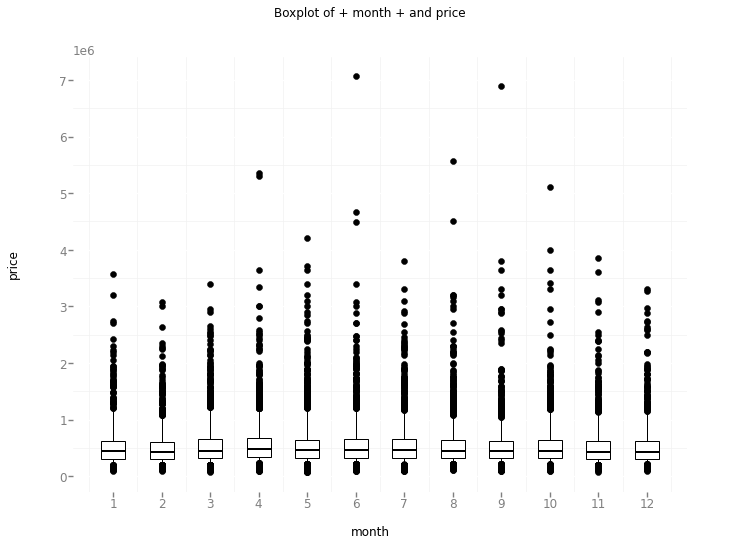

<ggplot: (8776799971497)>

In [50]:
ggplot(df,aes(x='month',y='price'))+geom_boxplot() + theme_bw()+ggtitle('Boxplot of + month + and price')

It looks like the data of the date are exactly for 1 year and in summer we have higher count of sales as long as the prices are higher around the summer months

## 3. Grades

In [51]:
df.groupby('grade').describe()['price'].round(2)

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
3,1.0,262000.00,NaN,262000.0,262000.0,262000.0,262000.0,262000.0
4,27.0,212001.85,97294.50,80000.0,142500.0,200000.0,273500.0,435000.0
5,242.0,248523.97,118100.28,78000.0,175000.0,228700.0,295750.0,795000.0
6,2037.0,301721.14,122665.43,82000.0,215000.0,275053.0,366350.0,1200000.0
7,8973.0,402568.12,155717.05,90000.0,285000.0,375000.0,485000.0,2050000.0
8,6065.0,542986.80,217627.96,140000.0,390000.0,510000.0,640000.0,3070000.0
9,2615.0,773738.22,316522.12,230000.0,571500.0,720000.0,880000.0,2700000.0
10,1134.0,1072347.47,484050.81,316000.0,768087.5,914327.0,1250000.0,3600000.0
11,397.0,1498946.24,706325.19,420000.0,1040000.0,1280000.0,1700000.0,7060000.0


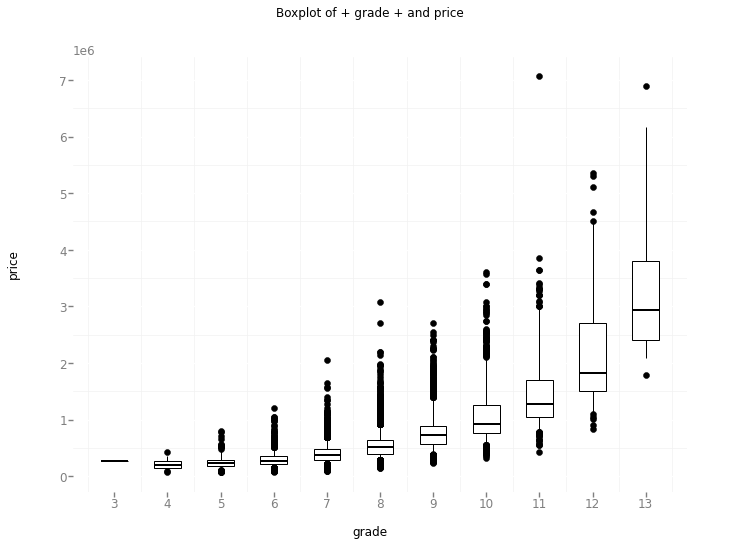

<ggplot: (8776799480604)>

In [52]:
ggplot(df,aes(x='grade',y='price'))+geom_boxplot() + theme_bw()+ggtitle('Boxplot of + grade + and price')

Generaly speaking the higher the house is graded the more expensive it is

Regression of multiple variables

# B) Locationions

##### Now let's have a closer look between the prices and the locations of the houses

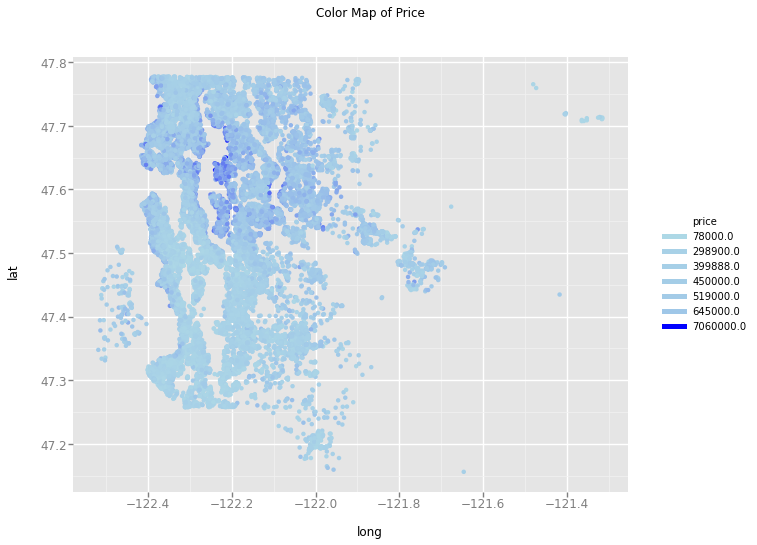

<ggplot: (8776800774906)>


In [53]:

lonlat = ggplot(df,aes(x='long',y='lat',color='price'))+geom_point()+scale_color_gradient(low='lightblue',high='blue')+ggtitle('Color Map of Price') 
print(lonlat)

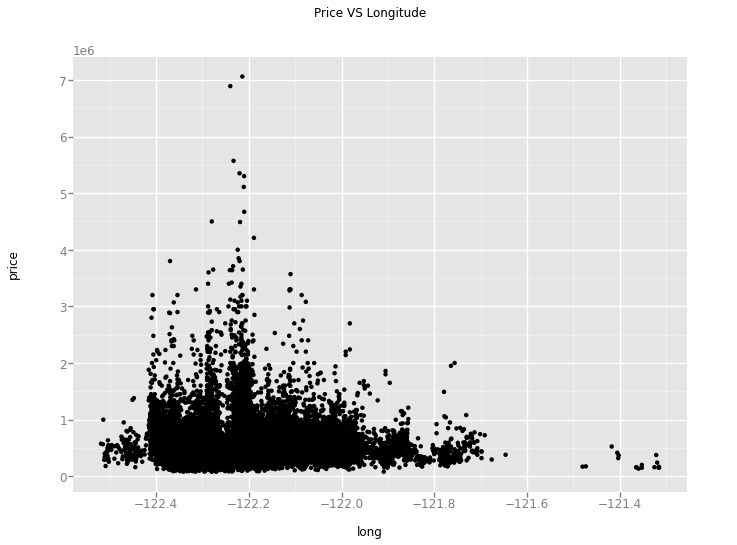

<ggplot: (8776801860922)>


In [54]:
lonprice = ggplot(df,aes(x='long',y='price'))+geom_point()+ggtitle('Price VS Longitude')
print(lonprice)

now for a better view we want to centralize the longtitude and take absolute values so the new values will be linear with house price. The central point we choose is -122.25.

In [55]:
def centralize_long(lon):
    return np.abs(lon+122.25)*-1
df['norm_lon'] = df['long'].apply(lambda x: centralize_long(x))

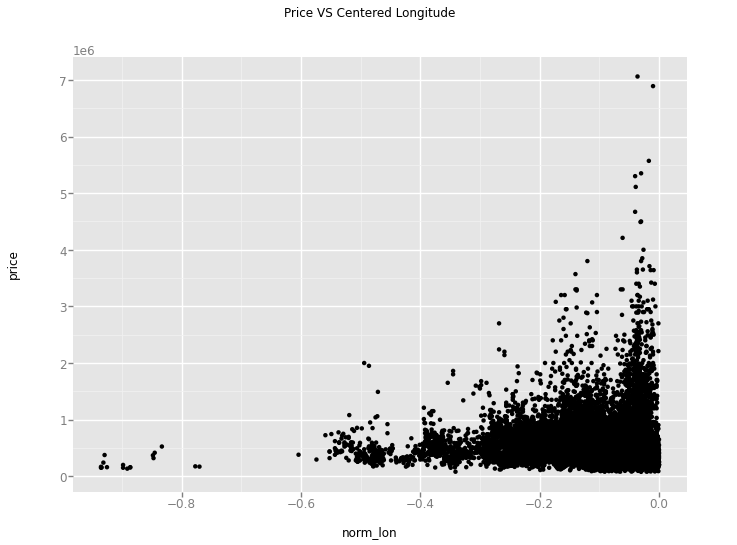

<ggplot: (8776801610915)>


In [56]:
lonprice2 = ggplot(df,aes(x='norm_lon',y='price'))+geom_point()+ggtitle('Price VS Centered Longitude')
print(lonprice2)

##### Same for latitude:

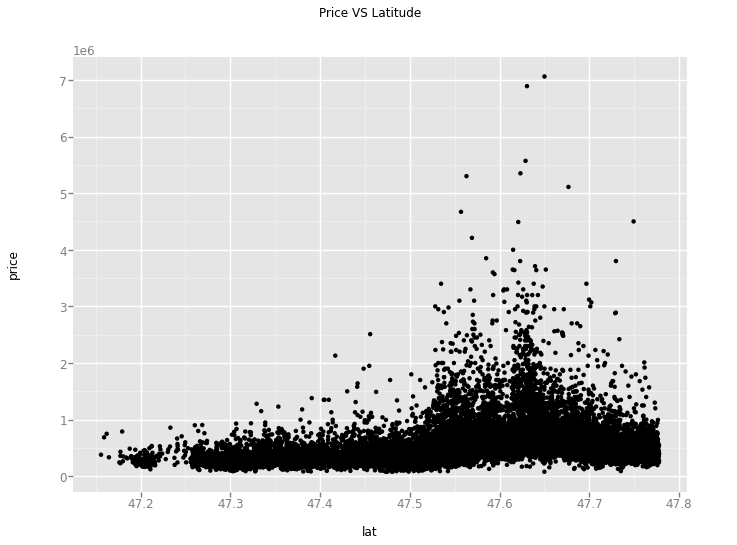

<ggplot: (8776802812308)>


In [57]:
latprice = ggplot(df,aes(x='lat',y='price'))+geom_point()+ggtitle('Price VS Latitude')
print(latprice)

The lantitude and longtitude in downtown of Seattle are 47.6050° N and 122.3344° W so we notice a significant increace of the prices as we approach the center of Seattle

our next step should be to examine the zipcodes

In [58]:
df.zipcode.unique(), df.zipcode.unique().size

(array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
        98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
        98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
        98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
        98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
        98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
        98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
        98031, 98106, 98072, 98188, 98014, 98055, 98039]),
 70)

we have 70 unique zipcodes in King County

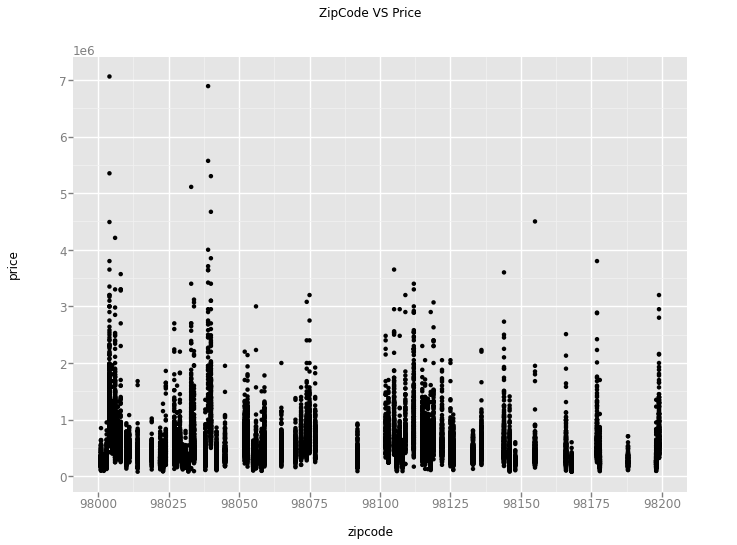

<ggplot: (8776802762418)>


In [59]:
zipprice = ggplot(df,aes(x='zipcode',y='price'))+geom_point()+ggtitle('ZipCode VS Price')
print(zipprice)

it looks though that tha zipecode has not an obvious impact on prices

# C) Working on our target group

Our target target goup is middle class families and couples and acording to our search the best are in seattle for a family to leave in is Queen Anne with zipcodes: 98109 98119 98129 98131 and  longtitude and latitude around 47.6323° N, 122.3569°

We have the median of 450,000 dolars for houses and from our search we found out that the median of the annual income of households in Seattle is around 93,500 dollars. So we our research should be below 650,000 dollars. we would also like the houses to have at least 3 bedrooms, 2 bathrooms, the building should not be older than 40 years or at least renovated

For the location we would like the house to have the following: 1. access to public transport, 2.close proximity to computer routs, 3. colsby parks and areas, 4. and quality schools

We should avoid houses with waterfront view and for the buyer we would suggest to buy a house in winter months or our sellers to focus selling on summer months

around this location 47.6323° N, 122.3569° with zipcode 98119 and 98109 we have the famous kerry park, the Queen Anne High School Condos, The Seattle Gym, John Hay Elementary School


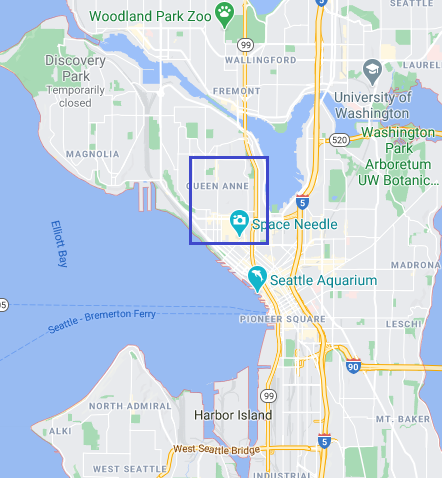

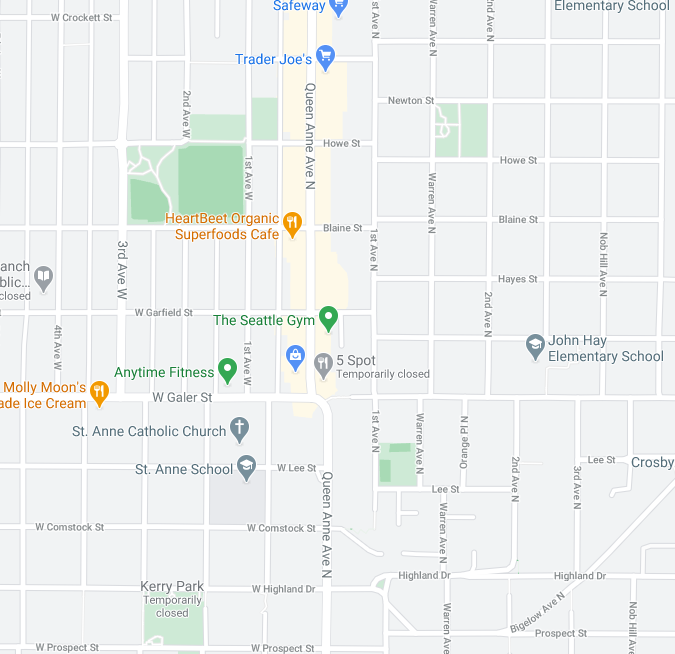

###### we investigate only for the zipcodes of Qeen Anne

In [60]:
house_1 = df.query('zipcode == 98119 or zipcode == 98109')

In [61]:
house_1.shape[0]

293

In [62]:
house_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,...,sqft_living15,sqft_lot15,basement_present,renovated,waterfront_view,viewed,year,month,price_per_sqft,norm_lon
26,937000.0,3,1.75,2450,2691,2.0,3,8,1750,1915,...,1760,3573,1,0,0,0.0,2014,6,382.448980,-0.110
43,685000.0,3,1.00,1570,2280,2.0,3,7,1570,1922,...,1580,2640,0,0,0,0.0,2014,10,436.305732,-0.114
85,940000.0,3,1.50,2140,3600,2.0,3,9,1900,1925,...,2020,4800,1,0,0,0.0,2014,11,439.252336,-0.115
140,665000.0,2,1.00,1110,3200,1.0,3,7,1110,1925,...,1170,3600,0,0,0,0.0,2014,6,599.099099,-0.108
146,890000.0,4,1.00,2550,4000,2.0,3,8,2370,1905,...,2200,4000,1,0,0,0.0,2014,6,349.019608,-0.103


##### we take the range for the price

In [63]:
house_1 = house_1.query('price < 650000')

In [64]:
house_1.shape[0]

104

###### we exclude the houses that have bedroom less that 3

In [65]:
house_1 = house_1.query('bedrooms > 2')

In [66]:
house_1.shape[0]

61

###### we take out the houses with waterfront view

In [67]:
house_1.waterfront_view.unique()

array([0])

We dont even need to... our family can't afford a house with waterfront view in Queen Anne...

###### we exclude the realy small spaces

It is widely believed that each person in a home requires 200-400 square feet of living space. so as a minimum we should take 1,100(102.1 sq_meters) square feet of living space

In [68]:
house_1 = house_1.query('sqft_living > 1300')

In [69]:
house_1.shape[0]

48

###### we exclude very old buildings

In [70]:
house_1.yr_built.max(), house_1.yr_built.min()

(2015, 1900)

In [71]:
house_1 = house_1.query('yr_built > 1950')

In [72]:
house_1.shape[0]

31

In [73]:
house_1 = house_1.query('yr_built > 1990 or renovated ==1')

In [74]:
house_1.shape[0]

27

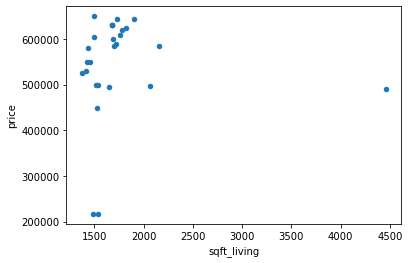

In [75]:
house_1.plot(x='sqft_living', y='price', kind='scatter')

the two very low prices might be that they have in our data a wrong zipcode

In [76]:
df['lat'].median()

47.5718

In [77]:
house_1 = house_1.query('lat > 47.5718 or renovated ==1')

In [78]:
house_1.shape[0] 

25

In [79]:
houses.loc[[21356]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21356,6169901185,5/20/2014,490000.0,5,3.5,4460,2975,3.0,0.0,2.0,...,10,3280,?,2015,NaN,98119,47.6313,-122.37,2490,4231


This place sounds too good to be true. The location come True though. So it is definetly worth checking with the agency, but for now we will take it out

In [80]:
house_1 = house_1.query('sqft_living != 4460')

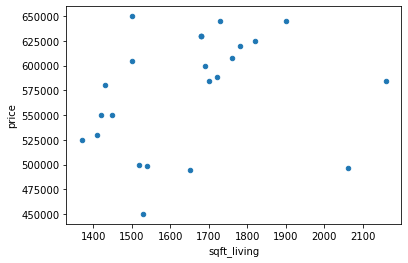

In [81]:
house_1.plot(x='sqft_living', y='price', kind='scatter')

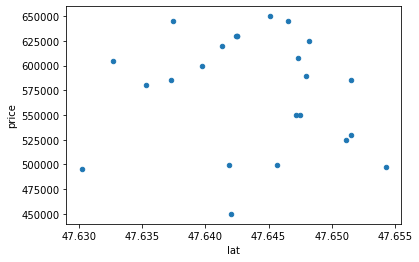

In [82]:
house_1.plot(x='lat', y='price', kind='scatter')

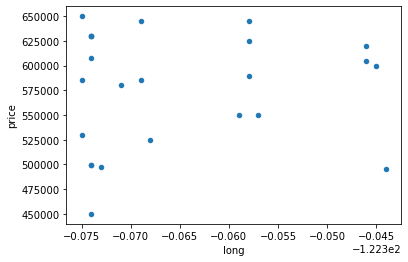

In [83]:
house_1.plot(x='long', y='price', kind='scatter')

there doesn't look like the location in our dataset has a bif impact in our dataset

###### lets check our top ten according to the price per sqft and the location

In [84]:
house_1.sort_values('price_per_sqft', ascending=True).head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,...,sqft_living15,sqft_lot15,basement_present,renovated,waterfront_view,viewed,year,month,price_per_sqft,norm_lon
4783,497000.0,3,3.0,2060,1850,2.0,3,8,1400,2007,...,1910,2951,0,0,0,0.0,2014,9,241.262136,-0.123
21088,585000.0,3,2.5,2160,1250,3.0,3,8,1830,2010,...,1870,2825,1,0,0,0.0,2014,12,270.833333,-0.125
5795,450000.0,3,2.5,1530,762,2.0,3,8,1050,2007,...,1610,1482,1,0,0,0.0,2014,7,294.117647,-0.124
19252,495000.0,3,3.5,1650,1577,2.0,3,7,1100,2012,...,1580,1280,1,0,0,0.0,2014,11,300.000000,-0.094
17208,499000.0,3,2.5,1540,1326,3.0,3,8,1390,1995,...,1680,1592,1,0,0,0.0,2014,7,324.025974,-0.124
13217,499950.0,3,2.5,1520,2208,2.0,3,8,1040,2007,...,1610,1618,1,0,0,0.0,2014,6,328.914474,-0.124
21264,645000.0,3,2.5,1900,1258,2.5,3,7,1700,2007,...,1780,1877,1,0,0,0.0,2015,3,339.473684,-0.108
13904,589000.0,3,3.0,1720,954,3.0,3,8,1460,2006,...,1720,1294,1,0,0,0.0,2014,8,342.441860,-0.108
16433,625000.0,3,3.0,1820,1641,3.0,3,8,1540,2006,...,1720,1501,1,0,0,0.0,2014,7,343.406593,-0.108
7770,585000.0,3,2.5,1700,1156,2.0,3,9,1320,2002,...,1710,1686,1,0,0,2.0,2014,10,344.117647,-0.119


In [85]:
house_1.sort_values('price_per_sqft', ascending=True)[['lat', 'long']].head(15) 

,lat,long
4783,47.6543,-122.373
21088,47.6515,-122.375
5795,47.6420,-122.374
19252,47.6302,-122.344
17208,47.6457,-122.374
13217,47.6419,-122.374
21264,47.6465,-122.358
13904,47.6480,-122.358
16433,47.6482,-122.358
7770,47.6373,-122.369


Our choice will be:

In [86]:
df.loc[[4783]]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,...,sqft_living15,sqft_lot15,basement_present,renovated,waterfront_view,viewed,year,month,price_per_sqft,norm_lon
4783,497000.0,3,3.0,2060,1850,2.0,3,8,1400,2007,...,1910,2951,0,0,0,0.0,2014,9,241.262136,-0.123


In [88]:
houses.loc[[4783]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4783,2770604920,9/3/2014,497000.0,3,3.0,2060,1850,2.0,0.0,0.0,...,8,1400,?,2007,NaN,98119,47.6543,-122.373,1910,2951
